# 1 Regressão Linear com uma Variável

In [28]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [59]:
x_label = 'Populacao x (10.000)'
y_label = 'Lucro x 10.000'

# Carregar dados
data = pd.read_csv('data/ex1data1.txt', header=None, names=[x_label, y_label])  
data.head() 

,Populacao x (10.000),Lucro x 10.000
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 1.1 Visualização dos Dados

Gerando um gráfico de dispersão usando a biblioteca Matplotlib

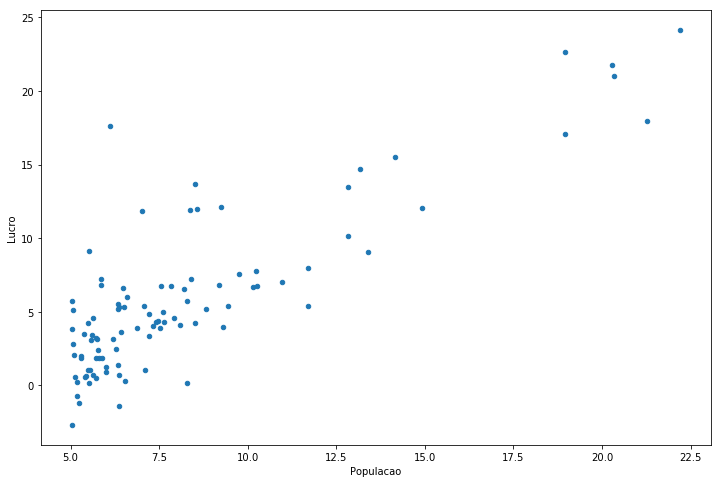

In [53]:
data.plot(kind='scatter', x=x_label, y=y_label, figsize=(12,8))  

## 1.2 Gradiente Descendente

In [31]:
def computarCusto(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [37]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 


# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [39]:
computarCusto(X, y, theta)

32.072733877455676

In [44]:
def gradiente_descendente(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computarCusto(X, y, theta)

    return theta, cost

In [45]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradiente_descendente(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

In [48]:
computarCusto(X, y, g)  

4.5159555030789118

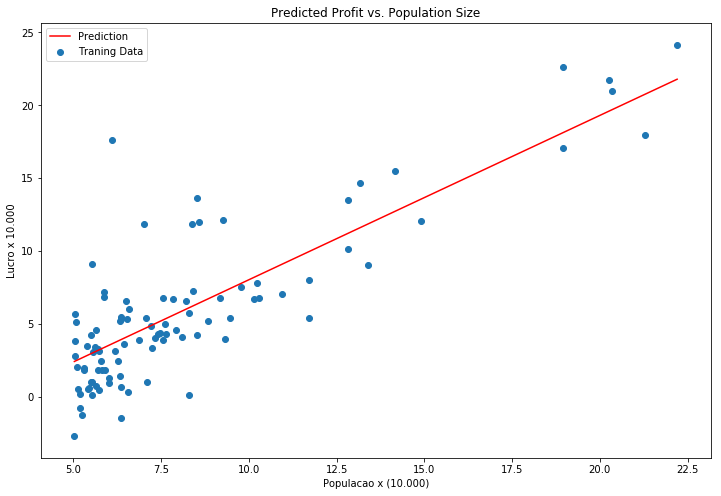

In [60]:
x = np.linspace(data[x_label].min(), data[x_label].max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data[x_label], data[y_label], label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel(x_label)  
ax.set_ylabel(y_label)  
ax.set_title('Predicted Profit vs. Population Size') 